# TIME RESOLVED ABSORBANCE SPECTRA EXAMPLE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

In [6]:
plt.rcParams["figure.figsize"] = (12,8)

Data file: `DATA3DABC.txt`

Data set: 

- First row corresponds to wavelength vector.
- First column corresponds to time vector.
- From second column to last one correspond to absorbance for each wavelength

This is an example for the Python course. In this case we will learn how to plot in 2D, plot in
3D and an exponential fitting.
Here are the results made in *Python*.

In [3]:
data = pd.read_table('../data/DATA3DABC.txt', index_col=0, delim_whitespace=True)
data.head()

,400,410,420,430,440,450,460,470,480,490,...,510,520,530,540,550,560,570,580,590,600
0.0,0.0661,0.2017,0.5000,0.7860,1.1268,1.3216,1.2874,1.2039,1.0212,0.8813,...,0.7773,0.6361,0.5539,0.4241,0.3110,0.2278,0.1283,0.0757,0.0367,0.0262
0.2,0.0924,0.1825,0.4382,0.7599,1.0307,1.2788,1.2326,1.1481,0.9752,0.8727,...,0.7718,0.6674,0.6159,0.5206,0.4223,0.3604,0.2311,0.1636,0.0631,0.0435
0.4,0.1068,0.1984,0.4115,0.7044,0.9822,1.1893,1.2093,1.0624,0.9881,0.8396,...,0.7747,0.7846,0.6690,0.5886,0.5462,0.3946,0.2835,0.2313,0.1517,0.0850
0.6,0.0439,0.2215,0.3719,0.7086,0.9656,1.1245,1.1348,1.0257,0.9310,0.8216,...,0.7963,0.7733,0.7440,0.6943,0.6129,0.5015,0.3572,0.2828,0.1717,0.0861
0.8,0.0630,0.1768,0.3483,0.6850,0.9040,1.0860,1.0907,1.0055,0.8997,0.8271,...,0.8062,0.8180,0.8179,0.7144,0.6680,0.5572,0.4128,0.3123,0.2205,0.1161


In [4]:
#Transpose the data, as we prefer time in columns and wavelength as index. Just a preference.
data = data.T
data.index = data.index.astype(np.int)
data.head()

,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,...,8.2,8.4,8.6,8.8,9.0,9.2,9.4,9.6,9.8,10.0
400,0.0661,0.0924,0.1068,0.0439,0.0630,0.0665,0.0290,0.0778,0.0525,0.0924,...,0.0394,0.0330,0.0375,0.0374,-0.0041,0.0322,0.0204,0.0079,0.0087,0.0442
410,0.2017,0.1825,0.1984,0.2215,0.1768,0.1739,0.1439,0.1845,0.1500,0.1514,...,0.0717,0.0615,0.0552,0.0607,0.1170,0.0499,0.0227,0.0848,0.0602,0.0365
420,0.5000,0.4382,0.4115,0.3719,0.3483,0.3186,0.3274,0.3015,0.3189,0.2889,...,0.1315,0.1599,0.0874,0.1115,0.0808,0.1285,0.1284,0.0706,0.1342,0.0773
430,0.7860,0.7599,0.7044,0.7086,0.6850,0.6082,0.5440,0.5470,0.5150,0.4949,...,0.1856,0.1784,0.1981,0.2167,0.1934,0.1957,0.2010,0.1278,0.1668,0.1731
440,1.1268,1.0307,0.9822,0.9656,0.9040,0.8747,0.8089,0.7613,0.7720,0.7493,...,0.2803,0.2984,0.2641,0.2840,0.2733,0.2836,0.2502,0.2646,0.2627,0.2275


## 2D Plot

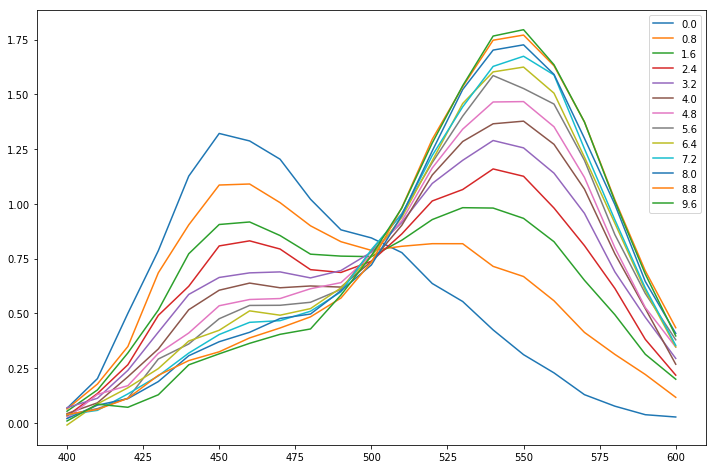

In [7]:
for time in data.columns[::4]:
    plt.plot(data[time], label=time)
plt.legend(loc='best')

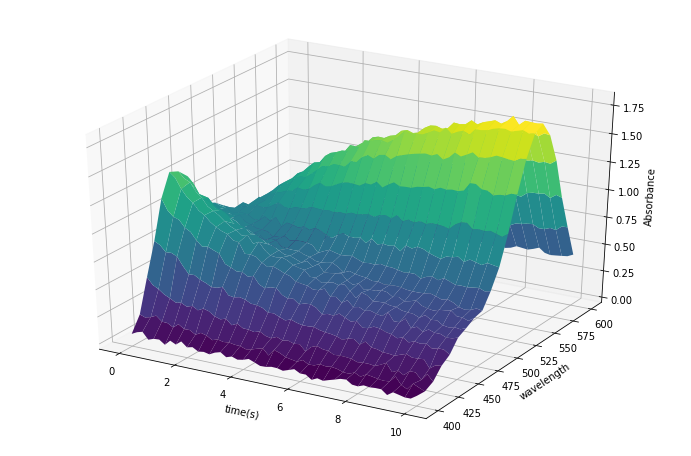

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
XI, YI = np.meshgrid(data.columns,data.index )
surf = ax.plot_surface(XI, YI, data.values,cmap=cm.viridis)
ax.set_xlabel('time(s)')
ax.set_ylabel('wavelength')
ax.set_zlabel('Absorbance');

## Exponential fit

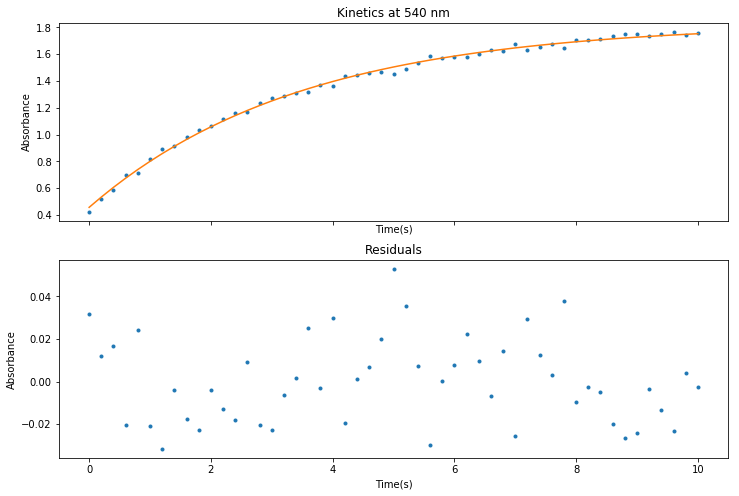

In [8]:
from scipy.optimize import curve_fit
#Data
x = data.columns
y = data.iloc[14]

#Model
def func(x, a, b, c):
     return a * np.exp(-b * x) + c
#Best fit parameters
p, cov = curve_fit(func,x,y)

#PLOT
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))
#Plot Data-model


ax1.plot(x,y,'.') #Noisy data
ax1.plot(x,func(x,*p),'-') #Best fit model
ax1.set_title('Kinetics at {} nm'.format(y.name))
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Absorbance')
#Residual plot
difference = func(x,*p) - y
ax2.plot(x,difference,'.')
ax2.set_title('Residuals')
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Absorbance');

## Using Plotly

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

In [26]:
plot_list = [
    go.Surface(x=XI, y=YI,
        z=data.values
    )
]

In [35]:
fig=go.Figure(data=plot_list,layout={'width':800, 'height':800, 'autosize':False})
py.iplot(fig)

## Not using pandas

One can also only use numpy, but then one has to keep track of wavelength and the times in different arrays and iterate them accordingly. Here is an example with just the first figure:

In [52]:
wave = np.genfromtxt('../data/DATA3DABC.txt', max_rows=1)
data2 =np.genfromtxt('./data/DATA3DABC.txt', skip_header=1)
times = data2[:,0] #First column is time
z = data2[:,1:] # and the remaining are data

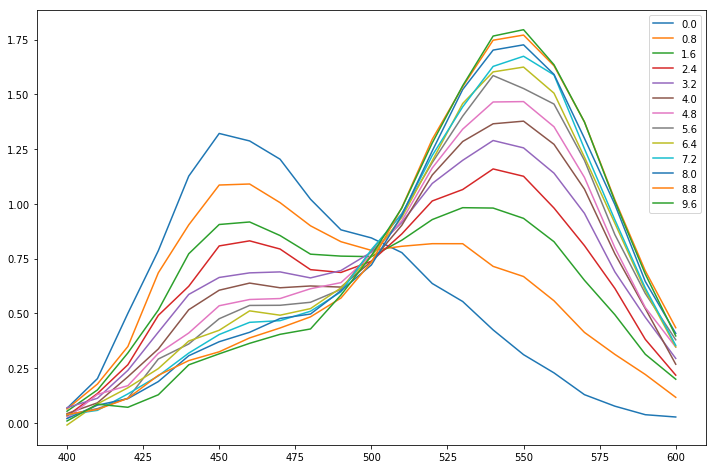

In [65]:
for t_i,z_i in zip(times[::4], z[::4]):
    plt.plot(wave, z_i, label=t_i)
plt.legend(loc='best')

for sequential data, it is probably better to use a sequential colormap such as _viridis_.

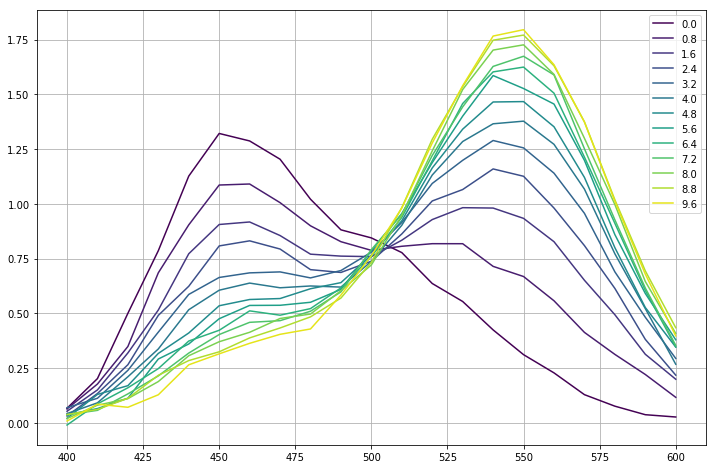

In [67]:
for t_i,z_i in zip(times[::4], z[::4]):
    plt.plot(wave, z_i, label=t_i, color=cm.viridis(t_i/times[-1]))
plt.legend(loc='best')
plt.grid()